# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [24]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
# your answer here
temp = pd.read_csv('Temp_States.csv')


#### Print `temp`

In [3]:
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
# your answer here
temp.dtypes

#City            object
#State           object
#Temperature    float64

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [5]:
# your answer here
temp[temp['State'] == 'New York']

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [9]:
# your answer here
temp[temp['State'] == 'New York'].groupby('State').agg({'Temperature':'mean'})

,Temperature
State,
New York,10.740741


#### We want to know cities and states with Temperature above 15 degress Celcius

In [10]:
# your answer here
temp[temp['Temperature'] > 15]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [13]:
# your answer here
temp[['City','Temperature']][temp['Temperature'] > 15]

,City,Temperature
0,NYC,19.444444
3,Hartford,17.222222
5,Treton,22.222222
6,Newark,20.000000


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [14]:
# your answer here
temp[['City','Temperature']][(temp['Temperature'] > 15) & (temp['Temperature'] < 20)]

,City,Temperature
0,NYC,19.444444
3,Hartford,17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [21]:
# Group States and aggregate mean and std
temp.groupby('State', as_index = False).agg({'Temperature':['mean','std']}) 



State Temperature          
                      mean       std
0  Connecticut   15.833333  1.964186
1   New Jersey   21.111111  1.571348
2     New York   10.740741  8.133404

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [22]:
# your answer here
employee = pd.read_csv('employee.csv')

#### Explore the data types of the employee dataframe. Comment your results

In [23]:
# your answer here
employee.dtypes

# Name          object 
# Department    object 
# Education     object 
# Gender        object
# Title         object 
# Years          int64
# Salary         int64

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000279A8BBBEE0>,
      dtype=object)

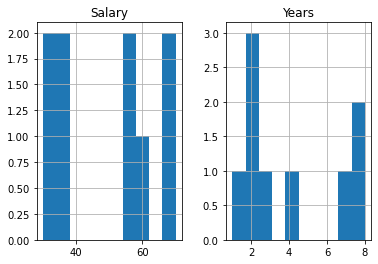

In [28]:
# your answer here
employee.hist()

""""
The histograms only show the numerical columns (Years, Salary).  
There are salaries that are four salaries under $40k and five salaries above $40k
The years of service are distributed between 0 and 8.
""""

#### What's the average salary in this company?

In [29]:
# your answer here
employee['Salary'].mean()

48.888888888888886

#### What's the highest salary?

In [30]:
# your answer here
employee['Salary'].max()

70

#### What's the lowest salary?

In [32]:
# your answer here
min_salary = employee['Salary'].min()
min_salary

30

#### Who are the employees with the lowest salary?

In [33]:
# your answer here
employee['Name'][employee['Salary'] == min_salary ]

1    Maria
2    David
Name: Name, dtype: object

#### Could you give all the information about an employee called David?

In [35]:
# your answer here
employee[employee['Name'] == 'David']


,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [37]:
# your answer here
employee['Salary'][employee['Name'] == 'David']


2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [40]:
# your answer here
employee[employee['Title'] == 'associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [41]:
# your answer here- 1 method
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [44]:
# your answer here- 2nd method
employee.iloc[0:3,:]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [46]:
# your answer here
employee[(employee['Title'] == 'associate') & (employee['Salary'] > 55)]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [49]:
# your answer here
employee.groupby('Years').agg({'Salary':'mean'}) 

,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [50]:
# your answer here
employee.groupby('Title').agg({'Salary':'mean'}) 

,Salary
Title,
VP,70.000000
analyst,32.500000
associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

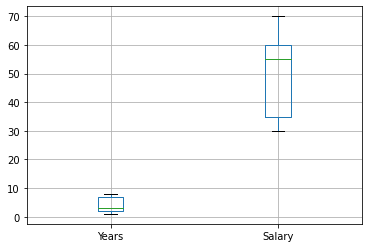

In [51]:
# draw boxplot here
employee.boxplot()

In [52]:
# print first quartile here
employee.quantile(.25)

Years      2.0
Salary    35.0
Name: 0.25, dtype: float64

In [53]:
# print third quartile here
employee.quantile(.75)

Years      7.0
Salary    60.0
Name: 0.75, dtype: float64

#### Is the mean salary per gender different?

In [55]:
# your answer here
employee.groupby('Gender').agg({'Salary':'mean'})

# The mean salary for females is 47.5 and the mean salary for males is 50.0

,Salary
Gender,
F,47.5
M,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [57]:
# your answer here
#employee.groupby('Department').describe()

#Group by Department and get the minumum, mean, and max.  The agg functions automaticlly only apply to numeric columns
employee.groupby('Department').agg(['min','mean','max'])

Years               Salary           
             min      mean max    min   mean max
Department                                      
HR             2  4.666667   8     30  45.00  70
IT             1  4.500000   8     30  48.75  70
Sales          2  2.500000   3     55  55.00  55

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [62]:
# your answer here
summary_df = employee.groupby('Department').agg(['min','mean','max'])
summary_df['Salary_dif'] = summary_df['Salary']['max'] - summary_df['Salary']['min']
summary_df.head()

Years               Salary            Salary_dif
             min      mean max    min   mean max           
Department                                                 
HR             2  4.666667   8     30  45.00  70         40
IT             1  4.500000   8     30  48.75  70         40
Sales          2  2.500000   3     55  55.00  55          0

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [66]:
# your answer here
orders = pd.read_csv('Orders\Orders.csv')

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [71]:
# your answer here
orders.describe()

# There are 397934 rows of data
# The orders are from January 2010 thru December 2011
# Average order was for $22.30 and contained 13 items
# The biggest order was for $168,469.60

orders.dtypes
# Unnamed: 0        int64
# InvoiceNo         int64
# StockCode        object
# year              int64
# month             int64
# day               int64
# hour              int64
# Description      object
# Quantity          int64
# InvoiceDate      object
# UnitPrice       float64
# CustomerID        int64
# Country          object
# amount_spent    float64

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [ ]:
# your answer here

####  What is the average Purchase Price?

In [68]:
# your answer here
orders['amount_spent'].mean()

# $22.39

22.39474850474768

#### What were the highest and lowest purchase prices? 

In [69]:
# your answer here
orders['amount_spent'].max()

168469.6

In [70]:
# your answer here
orders['amount_spent'].min()

0.0

#### Select all the customers we have in Spain

In [73]:
# your answer here
orders[orders['Country'] == 'Spain']

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [76]:
# your answer here
orders['Country'].value_counts()['Spain']

2485

#### Select all the customers who have bought more than 50 items ?

In [81]:
# your answer here

# Method #1
# Find out how many orders each customer made
customer_list = orders['CustomerID'].value_counts()

# Filter orders by customers with more than 50 orders
gt_50_customer = orders[orders['CustomerID'].isin(customer_list.index[customer_list.gt(50)])]

#Method #2 
gt_50_customer = orders.groupby('CustomerID').filter(lambda x: len(x) > 50)

#Obtain list of customers
gt_50_customer['CustomerID'].unique().tolist()

#### Select orders from Spain that are above 50 items

In [82]:
# your answer here
orders[(orders['Country'] == 'Spain') & (orders['Quantity'] > 50)]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
32454,52416,540785,84997B,2011,1,2,11,red 3 piece retrospot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
32455,52417,540785,84997D,2011,1,2,11,pink 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32456,52418,540785,84997C,2011,1,2,11,blue 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32457,52419,540785,84997A,2011,1,2,11,green 3 piece polkadot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
91155,136767,547972,22383,2011,3,1,16,lunch bag suki design,150,2011-03-28 16:41:00,1.45,12557,Spain,217.50


#### Select all free orders

In [83]:
# your answer here
orders[orders['amount_spent'] == 0]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
34494,56674,541109,22168,2011,1,4,15,organiser wood antique white,1,2011-01-13 15:10:00,0.0,15107,United Kingdom,0.0
53788,86789,543599,84535B,2011,2,4,13,fairy cakes notebook a6 size,16,2011-02-10 13:08:00,0.0,17560,United Kingdom,0.0
85671,130188,547417,22062,2011,3,3,10,ceramic bowl with love heart design,36,2011-03-23 10:25:00,0.0,13239,United Kingdom,0.0
92875,139453,548318,22055,2011,3,3,12,mini cake stand hanging strawbery,5,2011-03-30 12:45:00,0.0,13113,United Kingdom,0.0
97430,145208,548871,22162,2011,4,1,14,heart garland rustic padded,2,2011-04-04 14:42:00,0.0,14410,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [87]:
# your answer here
orders[orders['Description'].str.contains('lunch bag')]

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [89]:
# your answer here
orders[(orders['Description'].str.contains('lunch bag')) & (orders['year'] == 2011)]

#### Show the frequency distribution of the amount spent in Spain.

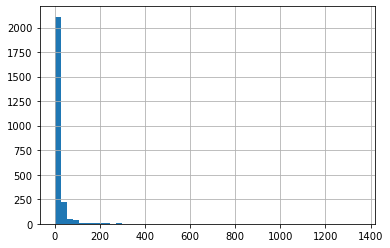

In [98]:
# your answer here
orders['amount_spent'][orders['Country'] == 'Spain'].hist(bins=50)

#### Select all orders made in the month of August

In [100]:
# your answer here
orders[orders['month'] == 8]

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [102]:
# your answer here
orders['Country'][orders['month'] == 8].value_counts()

United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: Country, dtype: int64

#### What's the  average amount of money spent by country

In [104]:
# your answer here
orders.groupby('Country').agg({'amount_spent':'mean'})

,amount_spent
Country,
Australia,116.895620
Austria,25.624824
Bahrain,32.258824
Belgium,20.283772
Brazil,35.737500
Canada,24.280662
Channel Islands,27.340160
Cyprus,22.134169
Czech Republic,33.069600


#### What's the most expensive item?

In [109]:
# your answer here
orders[['Description','UnitPrice']][orders['UnitPrice'] == orders['UnitPrice'].max()]

#Postage at $8,142.75

,Description,UnitPrice
118352,postage,8142.75


#### What was the average amount spent per year ?

In [110]:
# your answer here
orders.groupby('year').agg({'amount_spent':'mean'})

,amount_spent
year,
2010,21.892733
2011,22.430074
